<a href="https://colab.research.google.com/github/BharadwajDinesh/Internship_Assignments/blob/main/Vibe_Matcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/M.Tech/CODING/Nexora Internship/name-desc-vibes.csv')

In [ ]:
data.iloc[5]

,5
name,Chunky Knit Scarf
desc,"Oversized and soft, perfect for chilly days."
vibes,"['cozy', 'winter', 'comfort']"


In [ ]:
data['desc']

,desc
0,"Flowy, earthy tones for festival vibes."
1,"Perfectly distressed, timeless rebel style."
2,Chunky soles and dark aesthetic for a bold sta...
3,"Soft fleece, relaxed fit, ideal for study sess..."
4,"Flattering fit, versatile dark wash denim."
5,"Oversized and soft, perfect for chilly days."
6,"Timeless beige design, for a sophisticated look."
7,"Delicate lace trim, perfect for layering."
8,Comfortable and stylish for workouts or lounging.
9,Light and airy chiffon with a vibrant pattern.


# Embedding

In [ ]:
from google.colab import userdata
api = userdata.get('nexora')

In [ ]:
from google import genai
client = genai.Client(api_key=api)

In [ ]:
# Function to get embeddings for one text
def get_embedding(text):
    if not isinstance(text, str) or text.strip() == "":
        return None  # Handle empty or non-string values safely
    result = client.models.embed_content(
        model="gemini-embedding-001",
        contents=text
    )
    return result.embeddings[0].values  # Extract the embedding vector

# Apply to each row in the desc column
data["desc_embedding"] = data["desc"].apply(get_embedding)

In [ ]:
data.head(6)

,name,desc,vibes,desc_embedding
0,Boho Maxi Dress,"Flowy, earthy tones for festival vibes.","['boho', 'festival', 'summer']","[0.008681603, -0.020649157, -0.014923528, -0.0..."
1,Vintage Leather Jacket,"Perfectly distressed, timeless rebel style.","['vintage', 'edgy', 'timeless']","[-0.01716504, -0.013136926, -0.0076099117, -0...."
2,Goth Platform Boots,Chunky soles and dark aesthetic for a bold sta...,"['goth', 'edgy', 'bold']","[0.022605604, 0.0006580404, -0.0038132027, -0...."
3,Lofi Beats Hoodie,"Soft fleece, relaxed fit, ideal for study sess...","['lofi', 'cozy', 'relaxed']","[0.029576104, -0.013413854, -0.02617695, -0.06..."
4,High-Waist Skinny Jeans,"Flattering fit, versatile dark wash denim.","['classic', 'minimalist', 'versatile']","[-0.025836937, 0.009867515, -0.010428421, -0.0..."
5,Chunky Knit Scarf,"Oversized and soft, perfect for chilly days.","['cozy', 'winter', 'comfort']","[0.0050874627, -0.029238494, -0.03892629, -0.0..."


In [ ]:
query_text = "energetic urban chic"
query_embedding = get_embedding(query_text)

In [ ]:
len(query_embedding)

3072

# Vector Search Sim (Cosine Similarities)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [ ]:
embedding_matrix = np.array(data['desc_embedding'].tolist())

In [ ]:
cosine_sim_matrix = cosine_similarity(embedding_matrix)

print("\n--- Cosine Similarity Matrix (N x N) ---")
print(np.round(cosine_sim_matrix, 2))


--- Cosine Similarity Matrix (N x N) ---
[[1.   0.65 0.64 0.66 0.63 0.69 0.69 0.65 0.65 0.69 0.67]
 [0.65 1.   0.68 0.64 0.67 0.66 0.65 0.63 0.64 0.57 0.67]
 [0.64 0.68 1.   0.6  0.66 0.66 0.63 0.6  0.63 0.62 0.64]
 [0.66 0.64 0.6  1.   0.63 0.78 0.61 0.63 0.72 0.61 0.65]
 [0.63 0.67 0.66 0.63 1.   0.63 0.57 0.61 0.64 0.59 0.62]
 [0.69 0.66 0.66 0.78 0.63 1.   0.65 0.68 0.72 0.68 0.69]
 [0.69 0.65 0.63 0.61 0.57 0.65 1.   0.67 0.62 0.61 0.75]
 [0.65 0.63 0.6  0.63 0.61 0.68 0.67 1.   0.66 0.66 0.68]
 [0.65 0.64 0.63 0.72 0.64 0.72 0.62 0.66 1.   0.64 0.69]
 [0.69 0.57 0.62 0.61 0.59 0.68 0.61 0.66 0.64 1.   0.62]
 [0.67 0.67 0.64 0.65 0.62 0.69 0.75 0.68 0.69 0.62 1.  ]]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

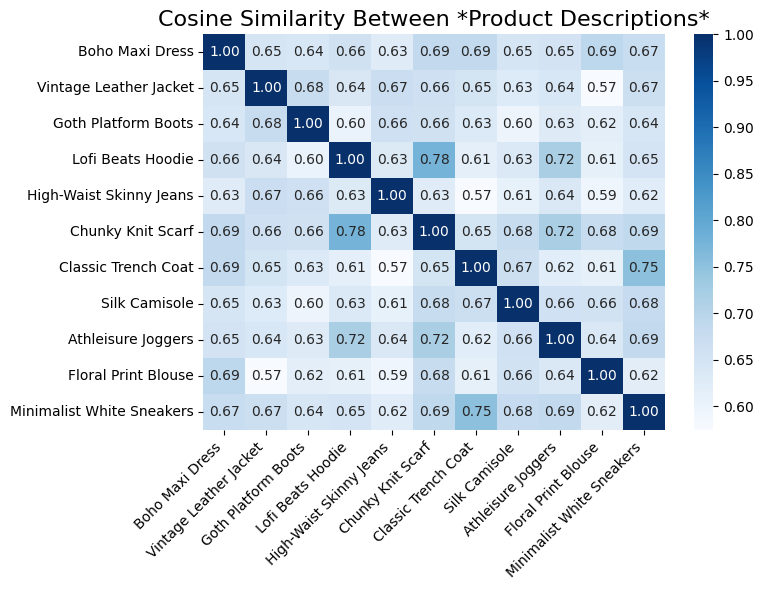

In [ ]:
# Visualize with Seaborn Heatmap
plt.figure(figsize=(8, 6))

# Get the labels from your dataframe
labels = data['name']

sns.heatmap(
    cosine_sim_matrix,
    annot=True,
    fmt='.2f',
    cmap='Blues',
    xticklabels=labels,
    yticklabels=labels
)

plt.title('Cosine Similarity Between *Product Descriptions*', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
def find_top_similar_products(query_text, data, embedding_matrix, num_results=3):
    # 1. Embedding for the query text
    query_embedding = get_embedding(query_text)
    if query_embedding is None:
        return "Error: Could not generate embedding for query text."

    # 2. Calculating cosine similarity between query and all existing embeddings
    similarity_scores = cosine_similarity([query_embedding], embedding_matrix)[0]

    # 3. Adding scores to a temporary DataFrame and get top matches
    temp_df = data.copy()
    temp_df['similarity_score'] = similarity_scores

    top_matches = temp_df.sort_values(by='similarity_score', ascending=False)

    return top_matches[['name', 'similarity_score']].head(num_results)

In [ ]:

query = "comfortable lounge wear for home"
top_similar = find_top_similar_products(query, data, embedding_matrix)

print(f"Top similar products for '{query}':")
display(top_similar)

Top similar products for 'comfortable lounge wear for home':


,name,similarity_score
8,Athleisure Joggers,0.725772
3,Lofi Beats Hoodie,0.676698
5,Chunky Knit Scarf,0.653680


In [ ]:
# Example usage with a different query:
query2 = "a dress for a summer festival"
top_similar2 = find_top_similar_products(query2, data, embedding_matrix)

print(f"\nTop similar products for '{query2}':")
display(top_similar2)


Top similar products for 'a dress for a summer festival':


,name,similarity_score
0,Boho Maxi Dress,0.739803
9,Floral Print Blouse,0.630069
8,Athleisure Joggers,0.585163


In [ ]:
query1 = "comfortable lounge wear for home"
top_similar1 = find_top_similar_products(query1, data, embedding_matrix)

print(f"Top similar products for '{query1}':")
display(top_similar1)

Top similar products for 'comfortable lounge wear for home':


,name,similarity_score
8,Athleisure Joggers,0.725772
3,Lofi Beats Hoodie,0.676698
5,Chunky Knit Scarf,0.653680


In [ ]:
query2 = "a dress for a summer festival"
top_similar2 = find_top_similar_products(query2, data, embedding_matrix)

print(f"\nTop similar products for '{query2}':")
display(top_similar2)


Top similar products for 'a dress for a summer festival':


,name,similarity_score
0,Boho Maxi Dress,0.739803
9,Floral Print Blouse,0.630069
8,Athleisure Joggers,0.585163


In [ ]:
query3 = "chic and professional office attire"
top_similar3 = find_top_similar_products(query3, data, embedding_matrix)

print(f"\nTop similar products for '{query3}':")
display(top_similar3)

ClientError: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/embed_content_free_tier_requests, limit: 0', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/embed_content_free_tier_requests', 'quotaId': 'EmbedContentRequestsPerMinutePerUserPerProjectPerModel-FreeTier'}]}]}}

# Reflection

Scalability (Improvement): The current brute-force cosine_similarity is too slow for large dataset. The top priority for improvement is integrating a dedicated vector database like Pinecone or Faiss, which uses Approximate Nearest Neighbor (ANN) for millisecond-speed search at scale.

